# Happiness Prediction

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [193]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [195]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [196]:
df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],axis=1,inplace= True)

In [197]:
df.rename(columns = {'Regional indicator':'Region','Logged GDP per capita':'GDP','Freedom to make life choices':'Freedom','Perceptions of corruption':'Corruption'}, inplace = True)

In [198]:
df.head()

,Country name,Region,Ladder score,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Ladder score in Dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43


In [199]:
df["Rank"] = np.arange(1,len(df)+1)

df.head()

,Country name,Region,Ladder score,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Ladder score in Dystopia,Rank
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43,3
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43,4
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43,5


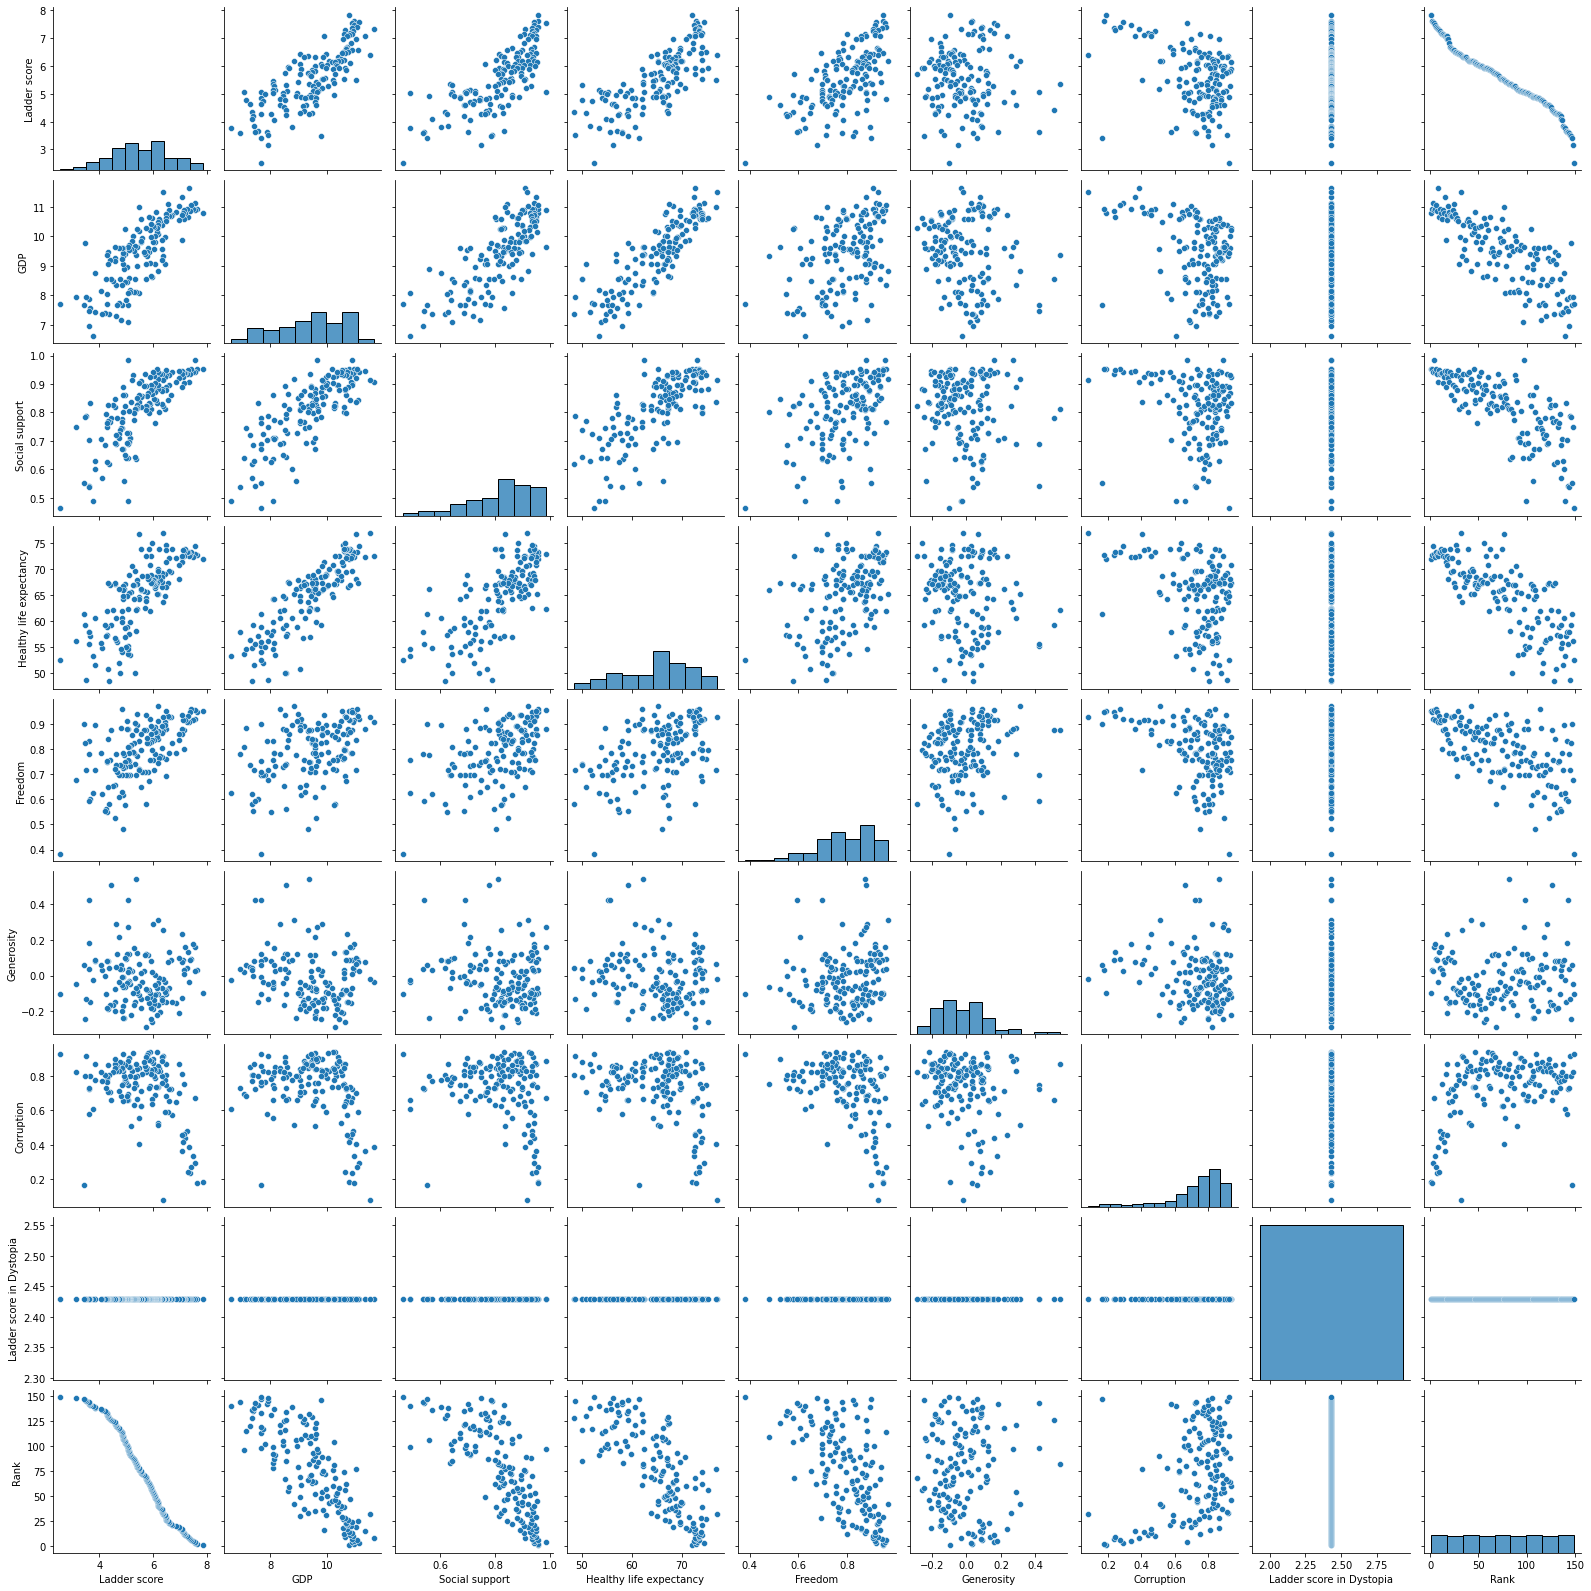

In [200]:
sns.pairplot(df)

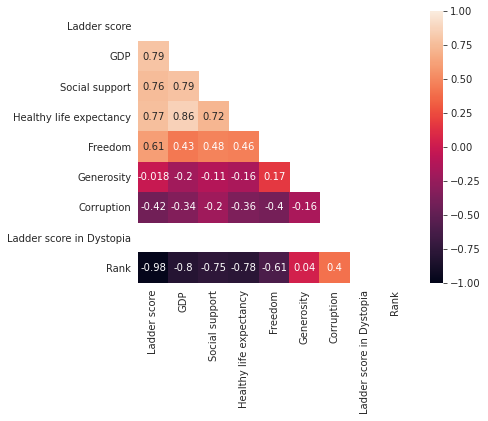

In [201]:
df_new=df.drop(['Country name','Region'],axis=1)
mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(df_new.corr(), mask=mask, vmax=1,vmin=-1,annot= True, square=True)

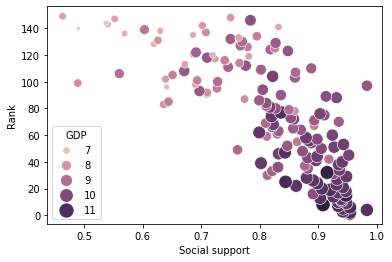

In [202]:
sns.scatterplot(data=df, x="Social support", y="Rank", hue="GDP", size="GDP",sizes=(20, 200));

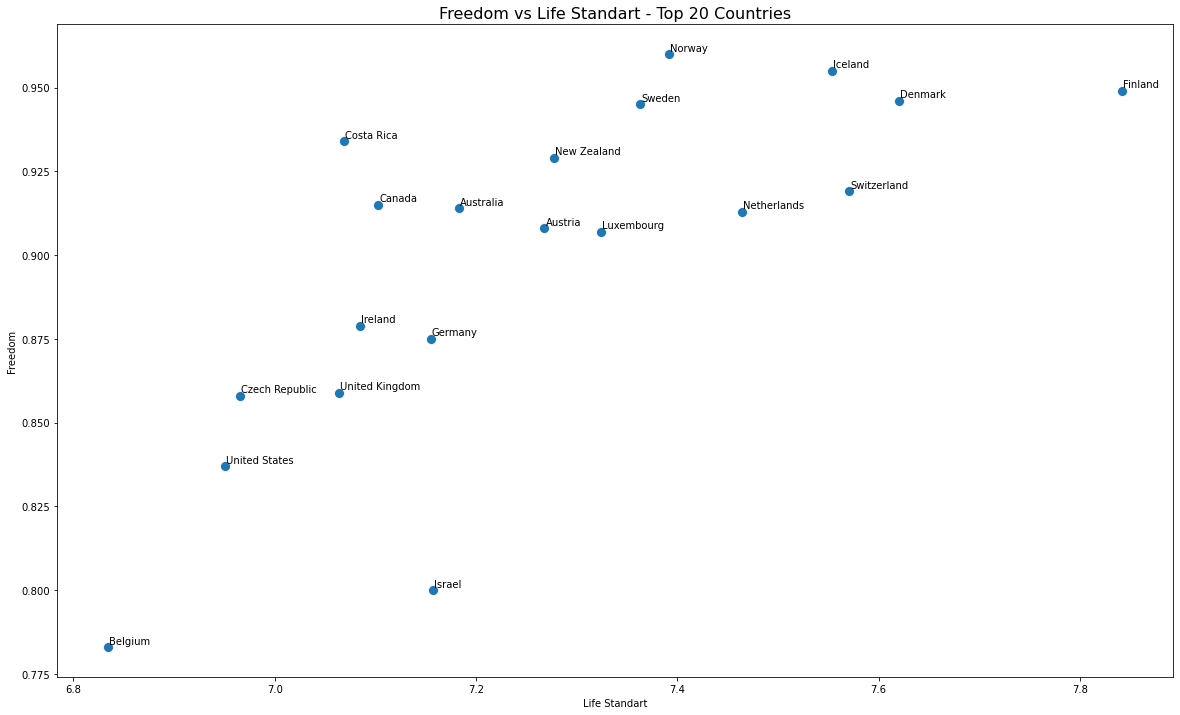

In [203]:
df_20 = df[:20]

plt.figure(figsize=(20,12))
sns.scatterplot(data=df_20,x='Ladder score',y='Freedom',s = 100)
for i in range(len(df_20)):
    plt.text(x=df_20['Ladder score'][i]+0.001,y=df_20['Freedom'][i]+0.001,s=df_20['Country name'][i],fontsize=10)
             
plt.title('Freedom vs Life Standart - Top 20 Countries',fontsize=16) #title
plt.xlabel('Life Standart') 
plt.ylabel('Freedom') 

plt.show()

<AxesSubplot:xlabel='Ladder score', ylabel='Ladder score in Dystopia'>

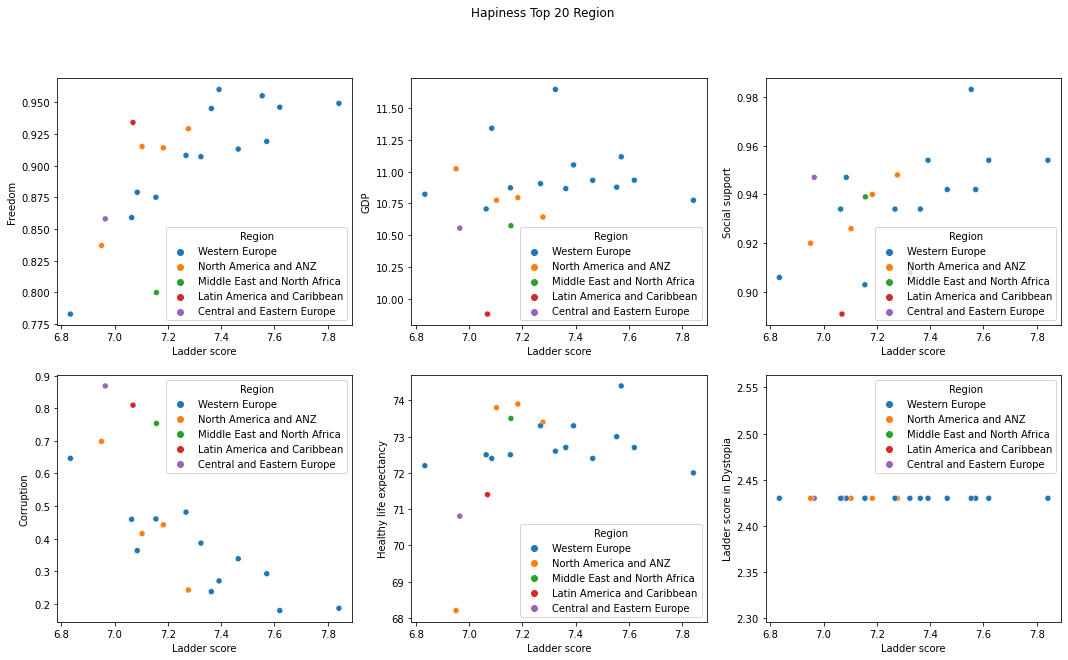

In [204]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Hapiness Top 20 Region')

sns.scatterplot(ax=axes[0, 0], data=df_20, x='Ladder score', y='Freedom',hue = 'Region')
sns.scatterplot(ax=axes[0, 1], data=df_20, x='Ladder score', y='GDP',hue = 'Region')
sns.scatterplot(ax=axes[0, 2], data=df_20, x='Ladder score', y='Social support',hue = 'Region')
sns.scatterplot(ax=axes[1, 0], data=df_20, x='Ladder score', y='Corruption',hue = 'Region')
sns.scatterplot(ax=axes[1, 1], data=df_20, x='Ladder score', y='Healthy life expectancy',hue = 'Region')
sns.scatterplot(ax=axes[1, 2], data=df_20, x='Ladder score', y='Ladder score in Dystopia',hue = 'Region')

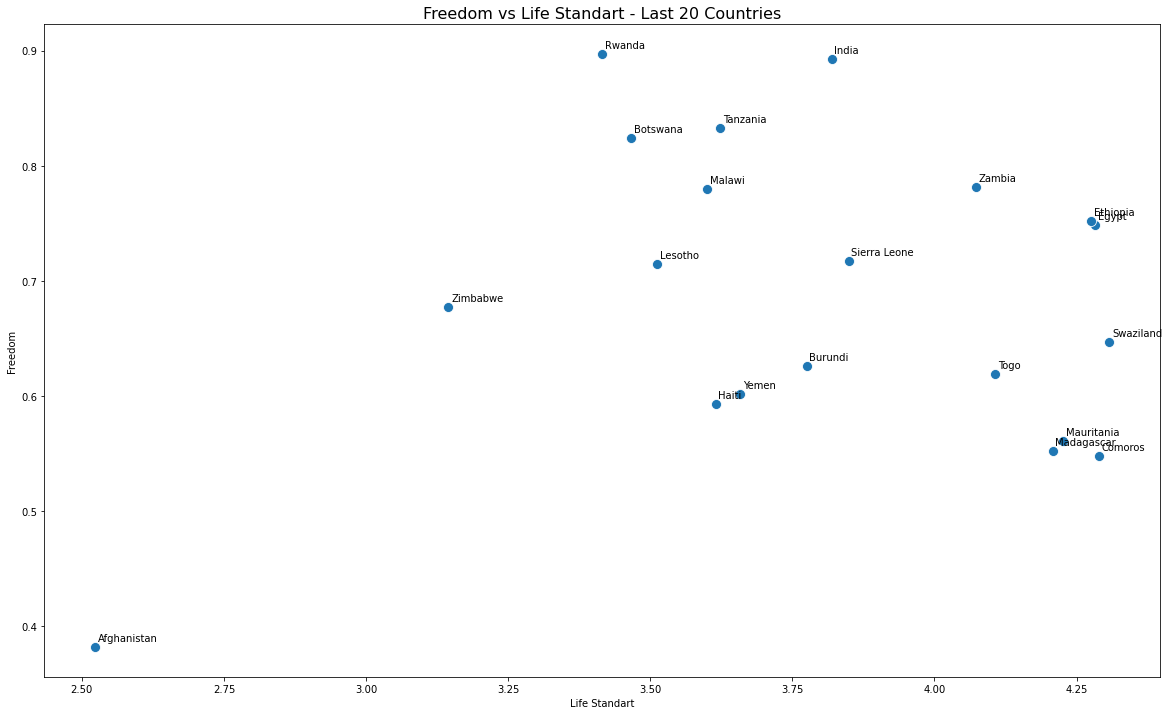

In [205]:
df_last_20 = df[-20:]
df_last_20=df_last_20.reset_index()

plt.figure(figsize=(20,12))
sns.scatterplot(data=df_last_20,x='Ladder score',y='Freedom',s = 100)
for i in range(len(df_last_20)):
    plt.text(x=df_last_20['Ladder score'][i]+0.005,y=df_last_20['Freedom'][i]+0.005,s=df_last_20['Country name'][i],fontsize=10)
             
plt.title('Freedom vs Life Standart - Last 20 Countries',fontsize=16) #title
plt.xlabel('Life Standart') 
plt.ylabel('Freedom') 

plt.show()

<AxesSubplot:xlabel='Ladder score', ylabel='Ladder score in Dystopia'>

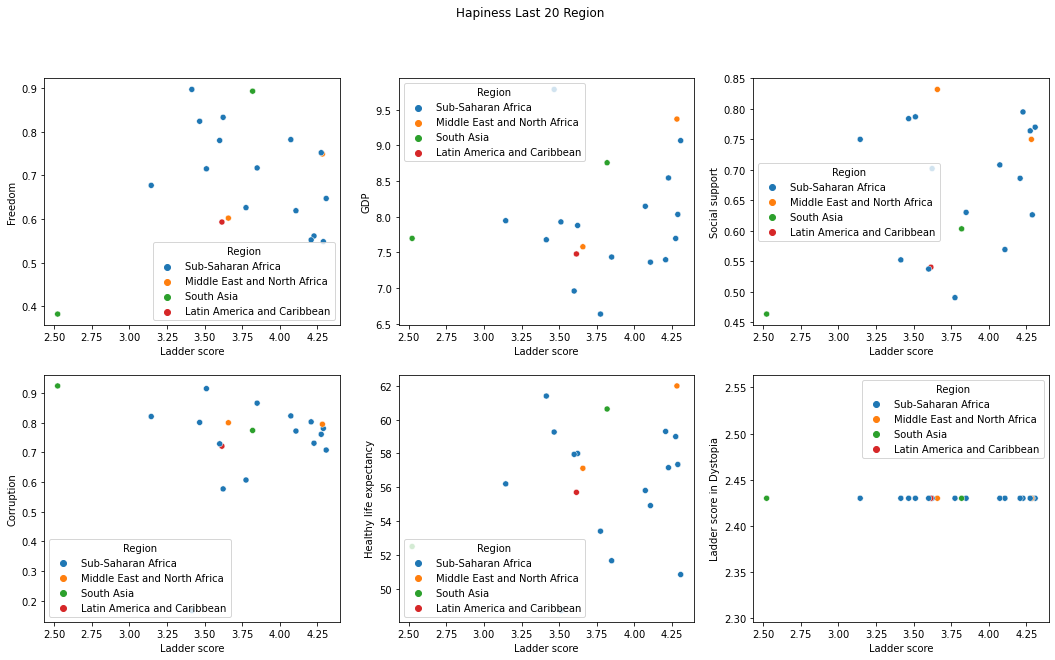

In [206]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Hapiness Last 20 Region')

sns.scatterplot(ax=axes[0, 0], data=df_last_20, x='Ladder score', y='Freedom',hue = 'Region')
sns.scatterplot(ax=axes[0, 1], data=df_last_20, x='Ladder score', y='GDP',hue = 'Region')
sns.scatterplot(ax=axes[0, 2], data=df_last_20, x='Ladder score', y='Social support',hue = 'Region')
sns.scatterplot(ax=axes[1, 0], data=df_last_20, x='Ladder score', y='Corruption',hue = 'Region')
sns.scatterplot(ax=axes[1, 1], data=df_last_20, x='Ladder score', y='Healthy life expectancy',hue = 'Region')
sns.scatterplot(ax=axes[1, 2], data=df_last_20, x='Ladder score', y='Ladder score in Dystopia',hue = 'Region')

In [187]:
a=df['Ladder score'].min()
b=df['Ladder score'].max()
value=(a+b)/2
value

5.1825

In [221]:
result = pd.concat([df_20,df_last_20])
result


,Country name,Region,Ladder score,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Ladder score in Dystopia,Rank,index
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1,NaN
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.43,2,NaN
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2.43,3,NaN
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2.43,4,NaN
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2.43,5,NaN
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270,2.43,6,NaN
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237,2.43,7,NaN
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,8,NaN
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242,2.43,9,NaN
9,Austria,Western Europe,7.268,10.906,0.934,73.300,0.908,0.042,0.481,2.43,10,NaN


In [222]:
result.reset_index()
result.drop(['index'],axis=1,inplace=True)

In [223]:
result['Ladder score']=result['Ladder score'] - value

result

,Country name,Region,Ladder score,GDP,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Ladder score in Dystopia,Rank
0,Finland,Western Europe,2.6595,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1
1,Denmark,Western Europe,2.4375,10.933,0.954,72.700,0.946,0.030,0.179,2.43,2
2,Switzerland,Western Europe,2.3885,11.117,0.942,74.400,0.919,0.025,0.292,2.43,3
3,Iceland,Western Europe,2.3715,10.878,0.983,73.000,0.955,0.160,0.673,2.43,4
4,Netherlands,Western Europe,2.2815,10.932,0.942,72.400,0.913,0.175,0.338,2.43,5
5,Norway,Western Europe,2.2095,11.053,0.954,73.300,0.960,0.093,0.270,2.43,6
6,Sweden,Western Europe,2.1805,10.867,0.934,72.700,0.945,0.086,0.237,2.43,7
7,Luxembourg,Western Europe,2.1415,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,8
8,New Zealand,North America and ANZ,2.0945,10.643,0.948,73.400,0.929,0.134,0.242,2.43,9
9,Austria,Western Europe,2.0855,10.906,0.934,73.300,0.908,0.042,0.481,2.43,10


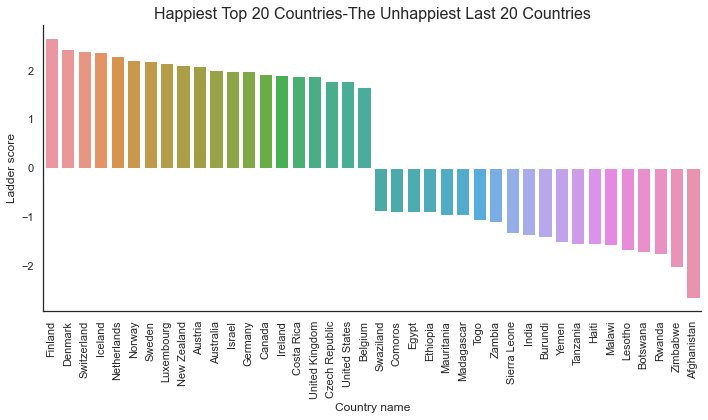

In [242]:
plt.figure(figsize=(10,6))
sns.barplot(data= result,x='Country name',y='Ladder score')
sns.set_theme(style="white")
sns.despine()
plt.title('Happiest Top 20 Countries-The Unhappiest Last 20 Countries',fontsize=16) 
plt.xticks(rotation=90)
plt.tight_layout()

# Linear Regresion

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn import metrics

In [254]:
df.columns

Index(['Country name', 'Region', 'Ladder score', 'GDP', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption',
       'Ladder score in Dystopia', 'Rank'],
      dtype='object')

In [257]:
X= df.drop(['Country name','Region','Ladder score','Rank'],axis=1)
Y= df['Ladder score']

In [258]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [259]:
model = LinearRegression().fit(x_train, y_train)
model.intercept_


-2.428324394841381

In [263]:
cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])
cdf


,Coeff
GDP,0.348747
Social support,2.496613
Healthy life expectancy,0.016396
Freedom,2.284162
Generosity,0.362298
Corruption,-0.324689
Ladder score in Dystopia,0.000000


In [287]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

r2_train = model.score(x_train, y_train)
r2_test = model.score(x_test, y_test)

mse_train = metrics.mean_squared_error(y_train, y_train_predict)
mse_test = metrics.mean_squared_error(y_test, y_test_predict)

data = {'r2_train': r2_train, 'r2_test': r2_test,'mse_train':mse_train,'mse_test': mse_test}
pd.DataFrame.from_dict(data,orient='index',columns=['value'])


,value
r2_train,0.779893
r2_test,0.672310
mse_train,0.264016
mse_test,0.324746


Accurancy score is %67. Social support and freedom play import role to be happy.

# Cross Validation

In [296]:
from numpy import mean
from numpy import std

In [311]:
LR = LinearRegression()

scores = cross_val_score(LR, x_train, y_train, scoring='r2', cv=5)

print(mean(scores))


0.7281512280140261


In [315]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(LR, x_train, y_train, scoring='r2', cv=folds)
print(mean(scores)) 

0.7244169783766783


# Year vs Happiness with Tableau

In [317]:
%%html
<div class='tableauPlaceholder' id='viz1623091190251' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ha&#47;HappiestCountries_16226632211860&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;HappiestCountries_16226632211860&#47;Dashboard1?:language=en-US&amp;:embed=true' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ha&#47;HappiestCountries_16226632211860&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1623091190251');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='2127px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>